In [1]:
#import different packages
import os, errno
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import random
import nltk
from nltk.tokenize import RegexpTokenizer
import pandas
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 

We are going to find the most important words in the books according to the TFIDF criterion. This criterion consists of 2 parts:

  * TF: Term frequency, in each book see how much time each word appears
  * IDF: Inverse document frequency, see how important this word is compared to its apparition in other books.
  
The result is a TFIDF matrix, in our case the rows are corresponding to the books and the colmuns to the words.


In [2]:
#We compute the TFIDF matrix on our books
filenames=['./books/'+f for f in os.listdir('./books/')]
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
           stop_words='english',input='filename')
book_tfidf = vect.fit_transform(filenames)

Now that we have the TFIDF matrix we can visualise it in a word cloud. We have done a word cloud for the 7 different books:

Book 1 - The Philosopher_s Stone


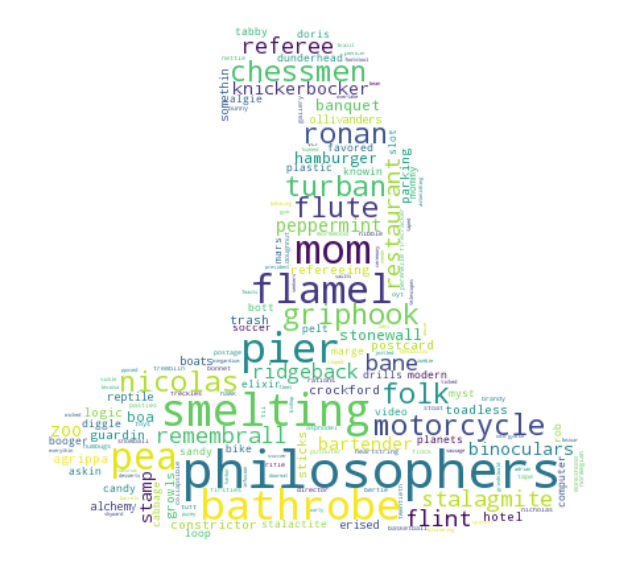

Book 2 - The Chamber of Secrets


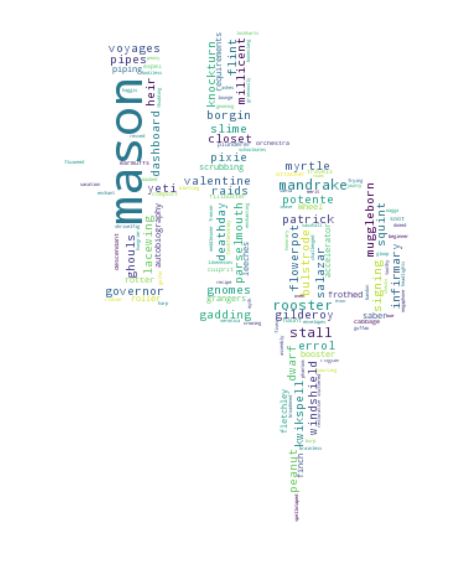

Book 3 - The Prisoner of Azkaban


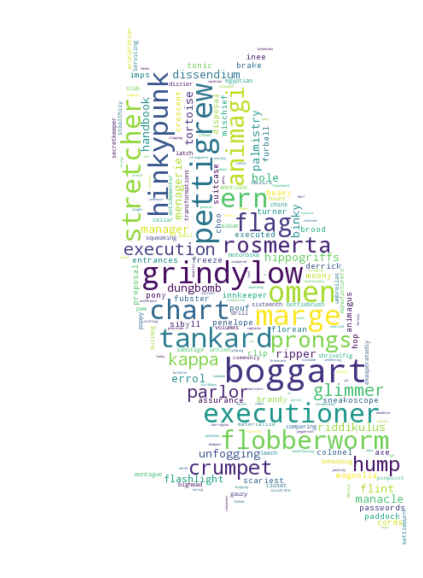

Book 4 - The Goblet of Fire


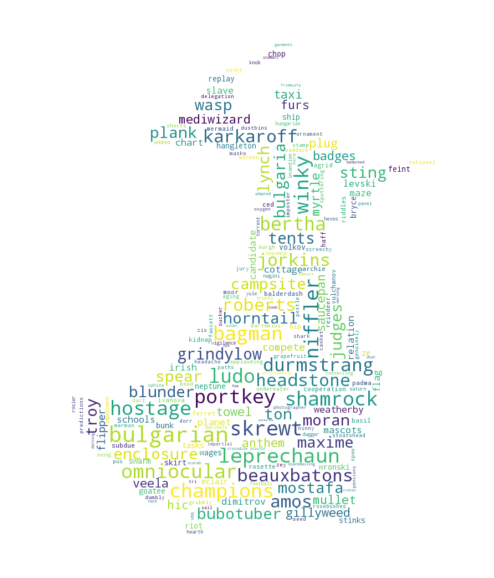

Book 5 - The Order of the Phoenix


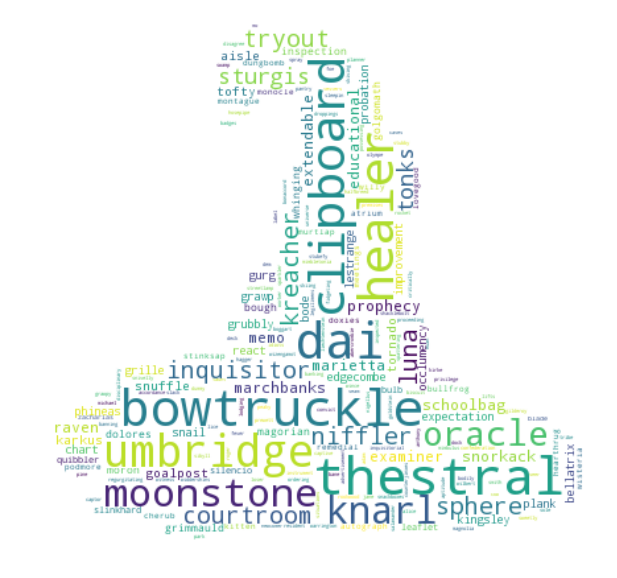

Book 6 - The Half Blood Prince


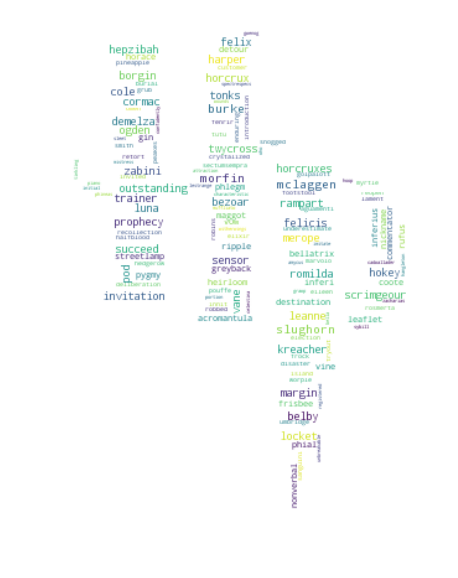

Book 7 - The Deathly Hallows


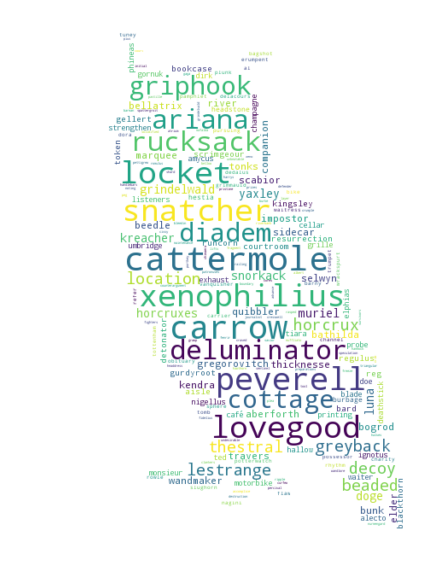

In [3]:

booknames=[f[:-4] for f in os.listdir('./books/')]

booknames=sorted(booknames)

#we will remove the text that is in the title of the books from the TFIDF count
textbooknames=''
for bookname in booknames:
    textbooknames+=bookname.lower()+' '
booktitles=nltk.regexp_tokenize(textbooknames,r'[a-zA-Z]+')

#list of words corresponding to the colums of the matrix
word_list=vect.get_feature_names()

N_wordcloud=book_tfidf.multiply(5000)

#picture locations for the wordcloud
listpicture=['./pictures_WC/'+f for f in os.listdir('./pictures_WC/')]

#we first create a long string to feed to the wordcloud
for counterbook, book in enumerate(booknames):
    print book
    s=''

    for  counterword,word in enumerate(word_list):

        if word not in booktitles:
            n=int(round(N_wordcloud[counterbook,counterword]))
            s+=(word+' ')*n


    # plot and save the wordcloud
    mask_HP = np.array(Image.open(listpicture[np.mod(counterbook,4)]))
    wordcloud = WordCloud(background_color="white",max_font_size=40,collocations = False,mask=mask_HP).generate(s)
    fig=plt.figure()
    fig.set_size_inches(15,10)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig('Wordcloud_'+book,bbox_inches='tight')    
    plt.show()
    
    
    

# Spell count

In [4]:
#import text of the Books    
f = open("books/Book 1 - The Philosopher_s Stone.txt")
text1 = f.read()

f = open("books/Book 2 - The Chamber of Secrets.txt")
text2 = f.read()

f = open("books/Book 3 - The Prisoner of Azkaban.txt")
text3 = f.read()

f = open("books/Book 4 - The Goblet of Fire.txt")
text4 = f.read()

f = open("books/Book 5 - The Order of the Phoenix.txt")
text5 = f.read()

f = open("books/Book 6 - The Half Blood Prince.txt")
text6 = f.read()

f = open("books/Book 7 - The Deathly Hallows.txt")
text7 = f.read()

texts=[text1,text2,text3,text4,text5,text6,text7]

for n,i in enumerate(texts):
    texts[n]=i.replace('"'," ")
    texts[n]=texts[n].replace('.'," ")
    texts[n]=texts[n].replace(','," ")
    texts[n]=texts[n].replace("'"," ")

We read the file containing the spells. Since ntlk only allows us to search for separate words and a spell is typically a sequence of words we will look for the different words of the spells and remove the spell parts that are too common in the English language.

In [5]:
df = pandas.read_excel('dataset spells.xlsx')
spells = df['Incantation'].values

spell_list=[item.lower() for val in spells for item in val.split()]
spell_list=set(spell_list)

#spell parts that are too common
dirt=['skin','spell' ,'ears','curse','flame','cheering'
,'sticking','point','flying','line','pack','head','switching'
,'freezing','gripping','babbling','stinging','avis','unbreakable'
,'extinguishing','conjunctivitis','aqua','bubble','prior','cave','drought','jinx']

for d in dirt:
    spell_list.remove(d)

We can now tokenize and do the raw count in the 7 books of Harry Potter:

In [6]:
#list of things to exclude
stopwords = nltk.corpus.stopwords.words('english')
stopwords+=[".",",","-","?",';',":","'","'","--","``","''"]
stopwords = set(stopwords)
exclude_words=stopwords

#%%%%%%%%%%%%%%%%%%%%%%%%%%



#list f the 7 frequency dictionaries
freq=[]

#we iterate over the different books
for n,text in enumerate(texts):
    
    #tokenize and remove stopwords
    tokens= nltk.regexp_tokenize(text,r'[a-zA-Z]+')
    tokens=[t.lower() for t in tokens if t.lower() not in exclude_words if len(t)>3]
    #compute raw count
    freq.append(nltk.FreqDist(tokens))

Now from the raw count we take only the words that are spells (spells that are in the spell list). We sort the spells in decreasing order of raw count.

In [7]:
resultName=[]
resultValue=[]

for nrb,dictionary in enumerate(freq):
    resultName.append([])
    resultValue.append([])
    
    #extracting the spells that are present in the book
    for spell in spell_list:
        if spell in dictionary:
            resultName[nrb].append(spell)
            resultValue[nrb].append(dictionary[spell])
            
    #sorting
    indices=sorted(range(len(resultValue[nrb])), key=lambda k: -resultValue[nrb][k])
    resultValue[nrb]=[resultValue[nrb][i] for i in  indices]
    resultName[nrb]=[resultName[nrb][i] for i in  indices]

We can now plot the results:

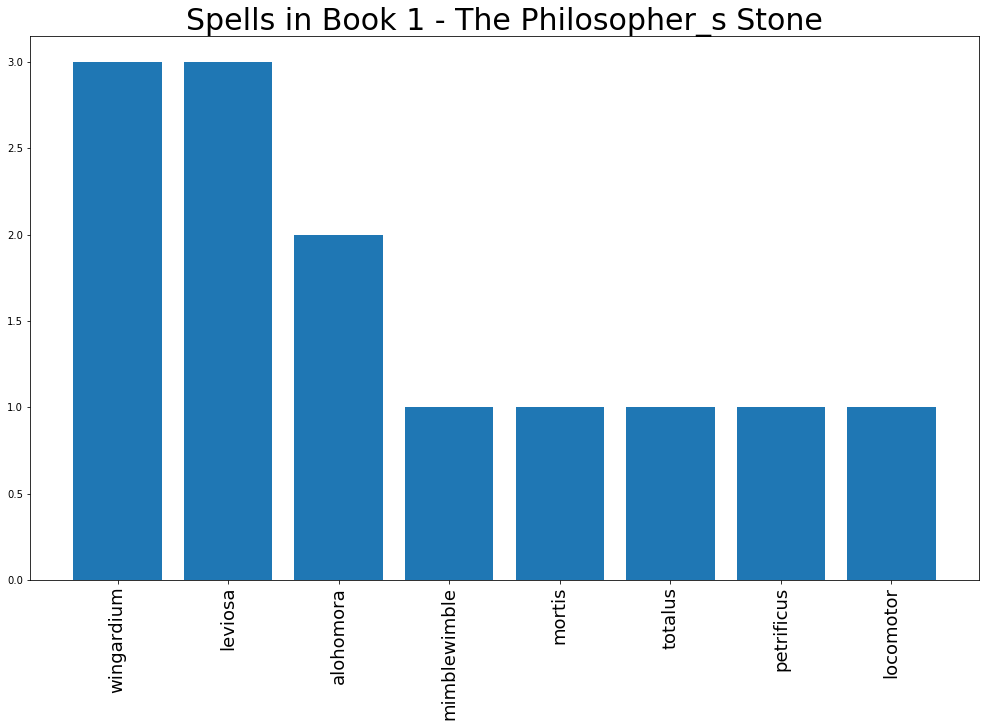

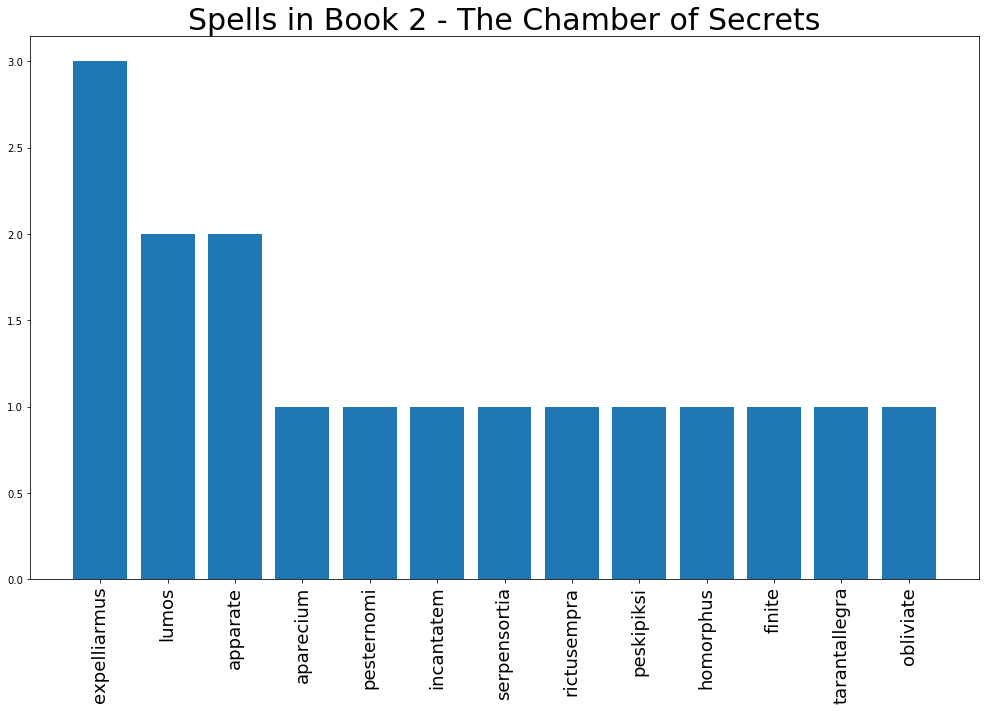

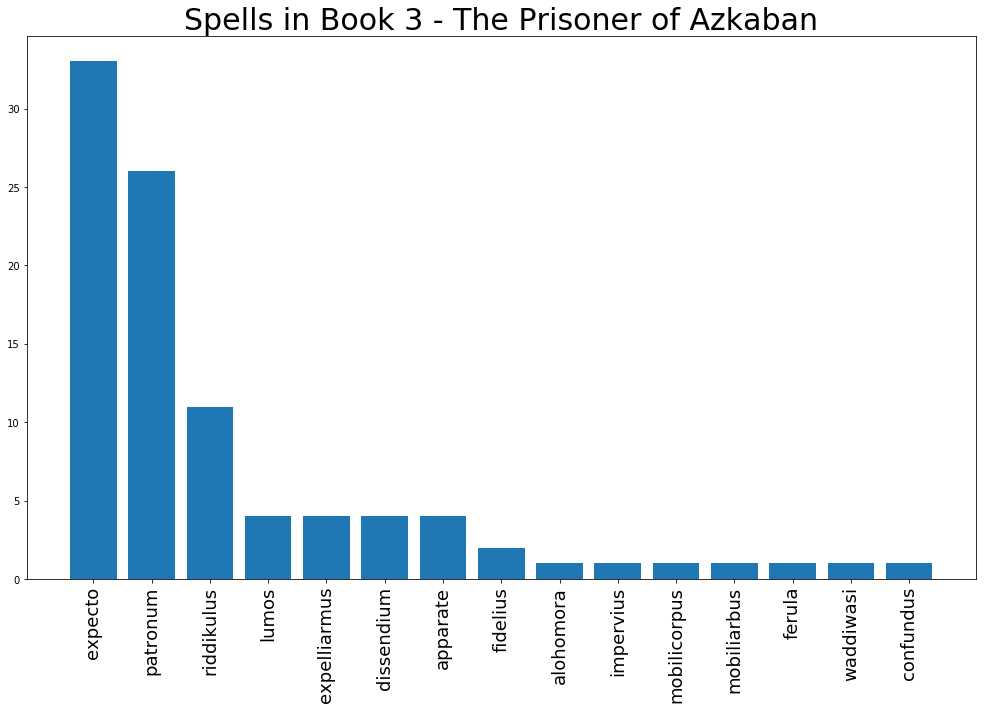

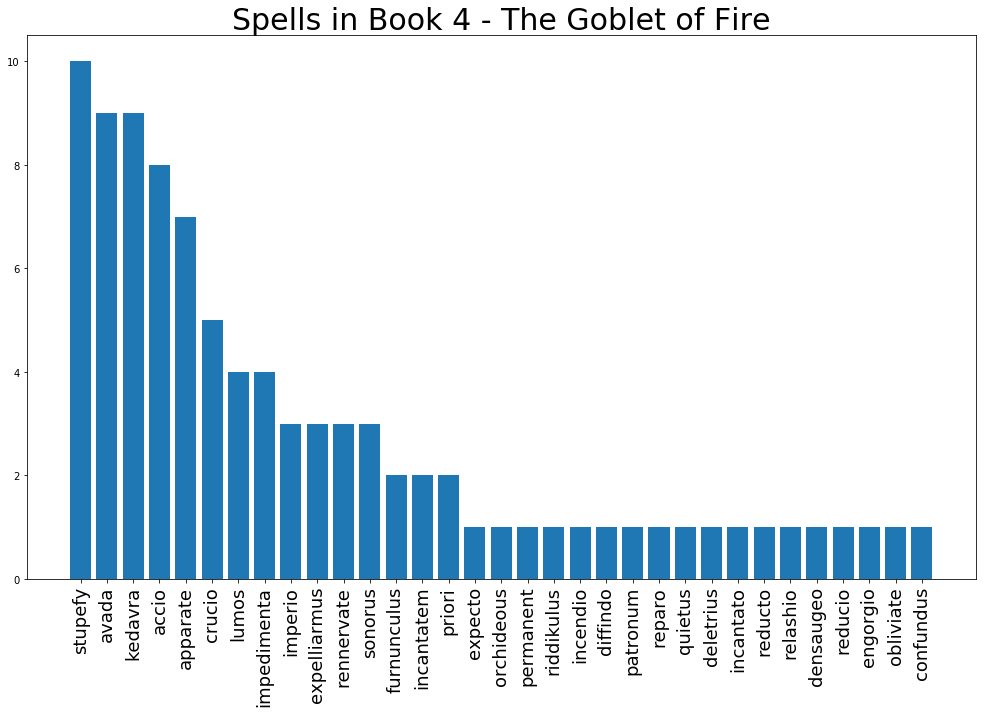

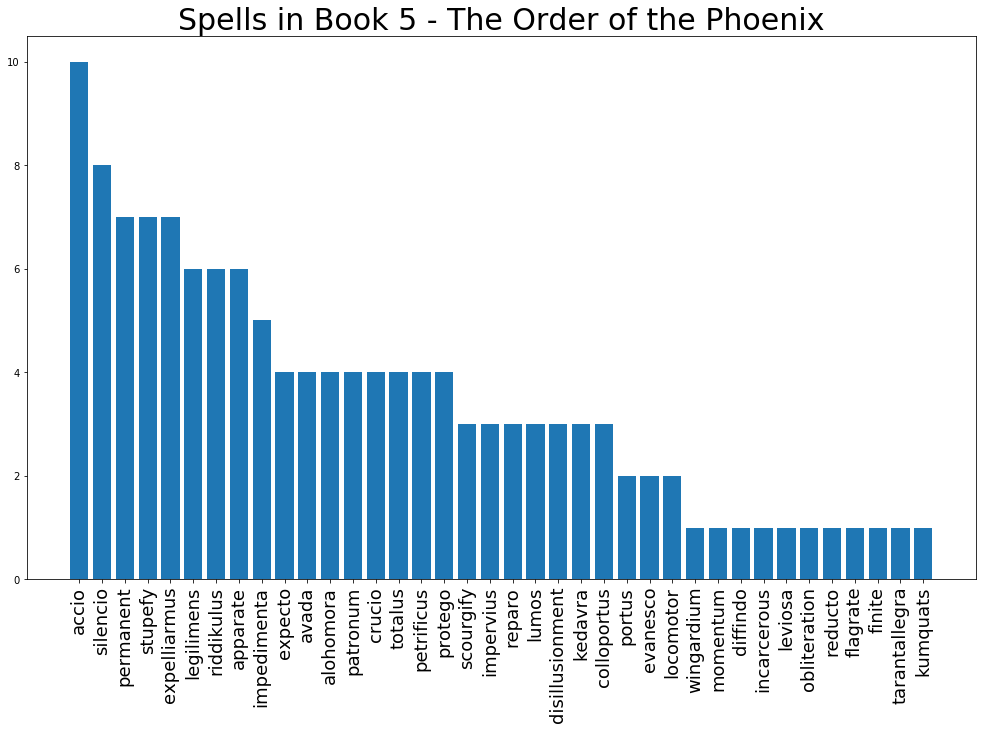

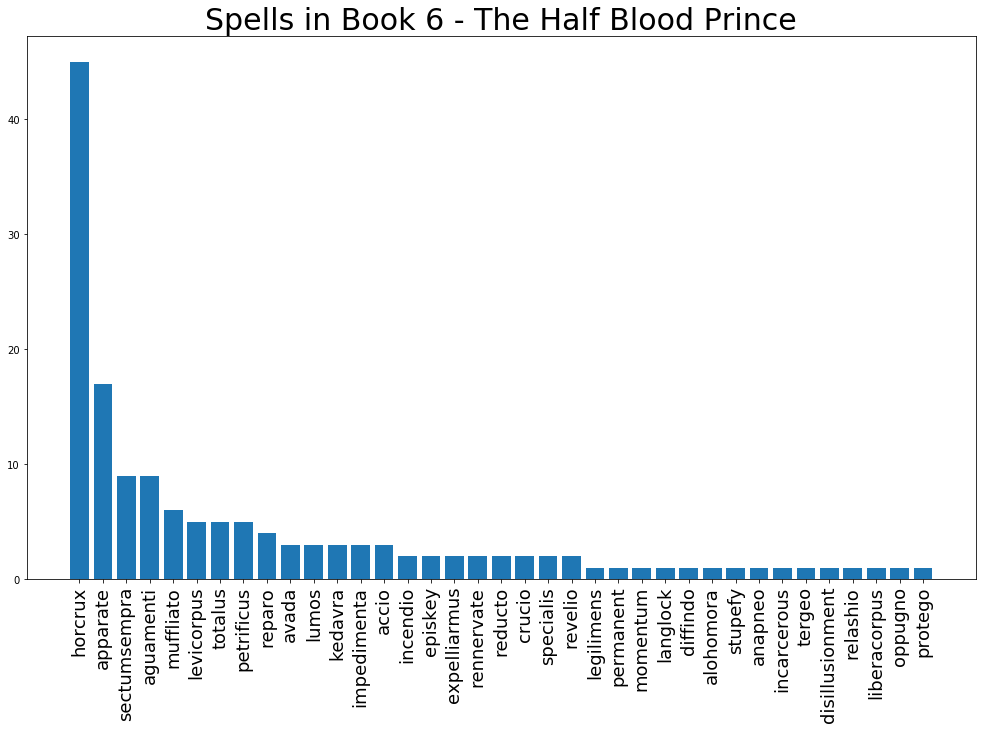

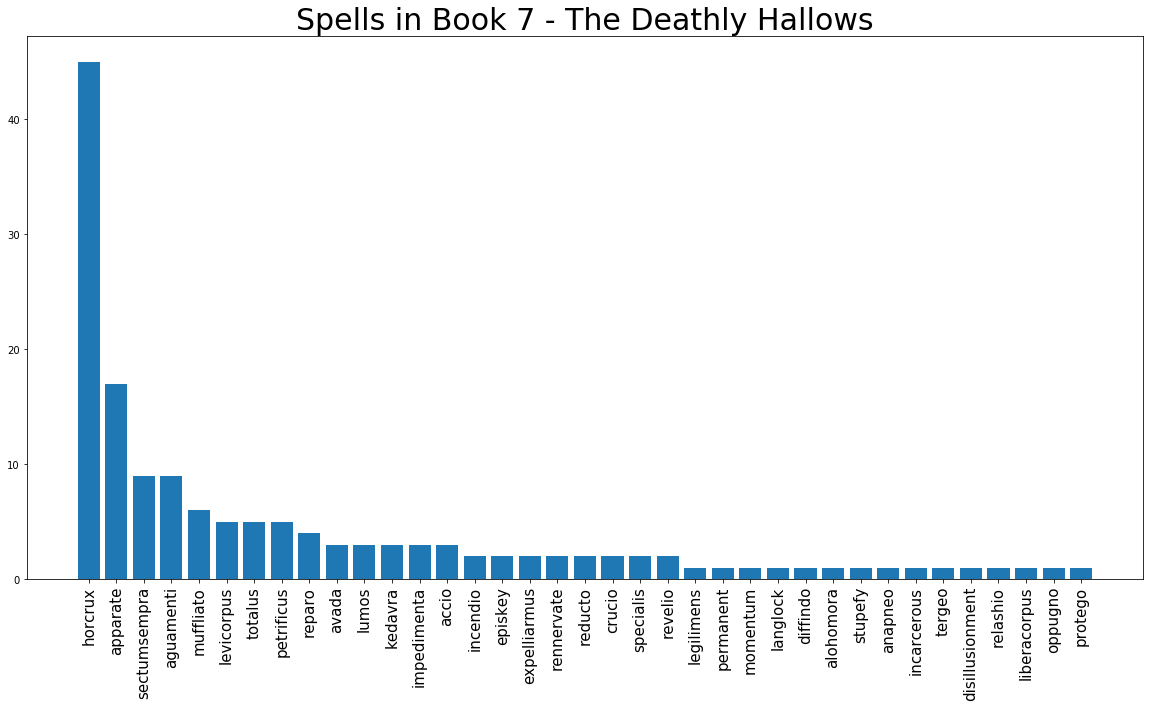

In [8]:
#plots for books 1 to 6
for n,book in enumerate(booknames[:-1]):
    fig, ax = plt.subplots(1,1) 
    fig.set_size_inches(17,10)
    plt.bar(range(len(resultValue[n])),resultValue[n])
    my_xticks = resultName[n]
    ax.set_xticks(range(len(resultValue[n])))
    ax.set_xticklabels(my_xticks,rotation='vertical', fontsize=18)
    plt.title('Spells in '+book,fontsize=30)
    fig.savefig('Spells_'+book,bbox_inches='tight')
    plt.show()

#plots for book 7    
book=booknames[-1]
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(20,10)
plt.bar(range(len(resultValue[n])),resultValue[n])
my_xticks = resultName[n]
ax.set_xticks(range(len(resultValue[n])))
ax.set_xticklabels(my_xticks,rotation='vertical', fontsize=15)
plt.title('Spells in '+book,fontsize=30)
fig.savefig('Spells_'+book,bbox_inches='tight')
plt.show()
